In [1]:
import math
import json
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Normalize usr_genre
def ugNorm(usr_genre):
    usr_genre_norm = np.zeros(usr_genre.shape)
    for i in range(len(usr_genre)):
        usr_genre_norm[i] = usr_genre[i]/np.max(usr_genre[i])
    print(usr_genre_norm.shape)
    return usr_genre_norm

def train_test_split(usr_following):
    #The number of following movie for each user
    each_user = np.sum(usr_following, axis=1)
    # print(each_user)

    print('Min number of followings:', np.min(each_user))
    print('Max number of followings:', np.max(each_user))
    print('Avg of followers:', np.mean(each_user))
    
    '''
    asc = np.sort(each_user)
    # print(each_user)
    # print(asc)
    desc = np.flip(asc)
    # print(desc)
    
    print('Over 10:', np.sum(each_user >= 10))
    print('Over 12:', np.sum(each_user >= 12))
    print('Over 14:', np.sum(each_user >= 14))
    print('Over 16:', np.sum(each_user >= 16))
    print('Over 18:', np.sum(each_user >= 18))
    print('Over 20:', np.sum(each_user >= 20))
    '''
    
    usr_idx = [i for i in range(len(usr_following))]
    print(len(usr_idx))

    random.seed(42)
    test_idx = sorted(random.sample(usr_idx, usr_test_amount))
    print(len(test_idx), test_idx[:10]) # 150 [13, 51, 54, 61, 65, 88, 93, 96, 114, 130]

    # init
    train_t = []
    train_f = []
    test_t = []
    test_f = []

    for i in range(usr_nb):
        # init
        t_for_train = []
        f_for_train = []
        t_for_test = []
        f_for_test = []

        if i not in test_idx: #if not in test id, just append it to true or false list
            for j in range(movie_nb):
                if usr_following[i][j] == 1:
                    t_for_train.append(j)
                else:
                    f_for_train.append(j)

            train_t.append(t_for_train)
            train_f.append(f_for_train)
    #         print(len(t_for_train) + len(f_for_train))

        else: #if in test id, choose half of true and other 
            temp_t = []
            temp_f = []

            for j in range(movie_nb):
                if usr_following[i][j] == 1:
                    temp_t.append(j)
                else:
                    temp_f.append(j)

            # random choose half true and half false for test 
            t_for_test = random.sample(temp_t, math.ceil(0.5*len(temp_t)))
            f_for_test  = random.sample(temp_f, movie_test_amount-len(t_for_test))

            test_t.append(t_for_test)
            test_f.append(f_for_test)

            #the others for training
            t_for_train = [item for item in temp_t if not item in t_for_test]
            f_for_train = [item for item in temp_f if not item in f_for_test]
            train_t.append(t_for_train)
            train_f.append(f_for_train)

        if not (len(t_for_train) + len(f_for_train) + len(t_for_test) + len(f_for_test)) == movie_nb:
            print('Error!!!')
            break
    
    return test_idx, train_t, train_f, test_t, test_f

In [3]:
# Basic setup
usr_following = np.load('./npy/user_followings.npy')
usr_genre = np.load('./npy/user_genre.npy')
movie_genre = np.load('./npy/movie_genre.npy')

print('Movie genre:', movie_genre.shape)
print('User following:', usr_following.shape)
print('User genre:', usr_genre.shape)

usr_nb = len(usr_following) # the number of users
movie_nb = len(movie_genre)  # the number of movies
print(usr_nb, movie_nb)

usr_test_amount = 150
movie_test_amount = 32
print(usr_test_amount, movie_test_amount)

usr_genre_norm = ugNorm(usr_genre)
test_idx, train_t, train_f, test_t, test_f = train_test_split(usr_following)

# Stat
#average num of following for training user
total_train = 0
for t in train_t:
    total_train += len(t)
avg = total_train / usr_nb
print('Training:', avg)

#average num of following for testing user
total_test = 0
for t in test_t:
    total_test += len(t)
avg = total_test / usr_test_amount
print('Testing:', avg)

all_auxilary = [i for i in range(movie_nb)]

Movie genre: (165, 20)
User following: (1582, 165)
User genre: (1582, 20)
1582 165
150 32
(1582, 20)
Min number of followings: 10
Max number of followings: 133
Avg of followers: 14.820480404551201
1582
150 [13, 51, 54, 61, 65, 88, 93, 96, 114, 130]
Training: 14.139064475347661
Testing: 7.1866666666666665


In [4]:
V = np.load('./npy/all_2372.npy')
print(V.shape)

matrixs = np.load('./weight/grid/MRM_E240_33.npz')
U = matrixs['U']
Y = matrixs['Y']
A = matrixs['A']
E = matrixs['E']
Wu = matrixs['Wu']
Wy = matrixs['Wy']
Wa = matrixs['Wa']
Wv = matrixs['Wv']
B = matrixs['B']

print('User latent shape: ',U.shape)
print('photo latent shape: ', Y.shape)
print('Auxilary latent shape: ',A.shape)
print('Embedding shape:', E.shape)
print('Wu weight shape:', Wu.shape)
print('Wy weight shape:', Wy.shape)
print('Wa weight shape:', Wa.shape)
print('Wv weight shape:', Wv.shape)
print('Beta shape:',B.shape)

(165, 2372)
User latent shape:  (1582, 64)
photo latent shape:  (165, 64)
Auxilary latent shape:  (165, 64)
Embedding shape: (240, 2372)
Wu weight shape: (1582, 165, 64)
Wy weight shape: (1582, 165, 64)
Wa weight shape: (1582, 165, 64)
Wv weight shape: (1582, 165, 240)
Beta shape: (1582, 240)


In [5]:
with open('../orderedListMovies.json', 'r') as openfile: 
    movie_ls = json.load(openfile)
print(len(movie_ls), movie_ls[:10])

with open('../orderedListGenres.json', 'r') as openfile: 
    genre_ls = json.load(openfile)
print(len(genre_ls), genre_ls[:10])

165 ['21bridgesmovie', '47metersdown', 'abeautifuldaymovie', 'abominablemovie', 'adastramovie', 'adogsjourneymovie', 'aftermathmovie', 'aftermovie', 'ahiddenlifefilm', 'alitamovie']
20 ['Action', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy']


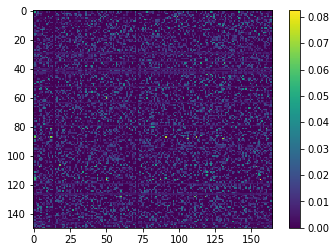

In [6]:
final_map = np.zeros(shape=(usr_test_amount,movie_nb))
map_id = 0

for idu in test_idx:
    alpha = np.dot(Wu[idu],U[idu].T)
    added_alpha = np.add(np.maximum(alpha, 0),0.0000000001)
    #print(added_alpha/np.sum(added_alpha))
    positive_alpha = []
    positive_yts = []
    for i in range(movie_nb):
        r =np.max(movie_genre[i]*usr_genre_norm[idu])
        positive_alpha.append(r*added_alpha[i])
        positive_yts.append(movie_ls[i])
    #print(positive_alpha)
    norm_alpha = positive_alpha/np.sum(positive_alpha)
    final_map[map_id] = norm_alpha
    map_id+=1
    
plt.imshow(final_map)
plt.colorbar()
plt.show()

In [7]:
final_map.shape

(150, 165)

In [8]:
df = pd.DataFrame(final_map, columns = movie_ls, index = test_idx)
# df.to_csv('./csv/user2movie.csv')
df

,21bridgesmovie,47metersdown,abeautifuldaymovie,abominablemovie,adastramovie,adogsjourneymovie,aftermathmovie,aftermovie,ahiddenlifefilm,alitamovie,...,underthesilverlake,usmovie,wavesmovie,whatmenwant,wonderparkmovie,wrinklestheclown,xmenmovies,yardiefilm,yesterdaymovie,zombieland
13,4.939380e-07,2.123361e-03,1.155552e-02,3.704535e-07,7.490455e-03,2.578288e-02,2.823745e-03,4.158334e-03,4.939380e-07,8.995490e-04,...,4.884728e-03,3.678247e-03,1.934873e-02,3.704535e-07,3.704535e-07,3.516482e-03,5.948693e-03,1.152079e-03,1.424053e-02,1.234845e-06
51,2.138286e-03,5.010506e-02,7.941878e-08,1.903203e-02,3.176751e-07,2.439039e-03,3.321306e-03,7.941878e-08,7.941878e-08,9.970154e-03,...,1.588376e-07,2.238861e-02,7.941878e-08,1.588376e-07,2.382563e-07,5.559314e-07,3.722657e-03,5.997204e-03,9.946476e-04,2.935436e-03
54,4.138210e-07,4.904752e-03,1.280472e-02,2.114230e-02,8.845829e-03,1.697651e-02,4.138210e-07,4.138210e-07,4.138210e-07,1.655284e-07,...,4.138210e-07,6.003039e-03,2.231080e-02,3.310568e-07,2.286612e-03,1.410648e-02,9.215132e-03,4.138210e-07,1.640872e-03,4.138210e-07
61,7.449208e-03,2.278783e-07,1.899378e-02,7.065797e-03,2.278783e-07,6.374955e-03,2.278783e-07,2.278783e-07,2.278783e-07,1.302162e-07,...,2.278783e-07,2.690709e-03,1.029037e-02,9.766213e-08,9.766213e-08,9.766213e-08,1.121493e-02,2.278783e-07,9.766213e-08,1.302162e-07
65,4.378218e-07,1.272232e-02,0.000000e+00,3.730045e-04,6.567326e-07,4.378218e-07,0.000000e+00,0.000000e+00,0.000000e+00,4.378218e-07,...,3.897767e-03,8.756435e-07,0.000000e+00,6.637856e-04,3.024843e-02,1.308920e-03,2.383477e-02,0.000000e+00,2.698890e-02,6.658641e-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1529,1.535126e-07,3.070253e-07,1.360352e-02,1.004797e-02,3.012127e-02,1.896114e-02,4.435451e-03,8.594313e-03,1.023418e-07,2.046835e-07,...,8.586585e-03,5.122896e-03,1.023418e-07,1.023418e-07,2.046835e-07,3.070253e-07,1.400625e-03,8.796918e-03,8.697766e-03,5.937335e-03
1547,1.054708e-02,1.163680e-02,5.111257e-03,6.911677e-03,5.111257e-03,8.311281e-03,1.231474e-02,5.111257e-03,7.782481e-03,3.145389e-03,...,5.111257e-03,1.965868e-03,1.158150e-02,7.651076e-03,3.145389e-03,7.444871e-03,6.775466e-03,5.111257e-03,4.365416e-03,3.145389e-03
1554,2.772905e-02,1.676716e-02,2.555195e-02,1.276901e-03,1.735706e-07,8.768126e-03,3.071753e-02,2.693659e-02,1.735706e-07,1.756286e-03,...,9.231420e-03,1.735706e-08,1.735706e-07,3.471413e-08,2.794436e-03,8.871799e-04,3.471413e-08,8.598549e-03,3.471413e-08,2.030945e-03
1563,1.533904e-03,1.967627e-02,3.408676e-04,1.802539e-02,1.916093e-02,1.481349e-02,3.408676e-04,4.054367e-03,3.408676e-04,1.151300e-02,...,6.817352e-04,1.704338e-03,3.791071e-03,8.773359e-03,1.363470e-03,1.704338e-03,1.748529e-02,4.881665e-03,8.786248e-03,9.772127e-03


In [9]:
np.dot(final_map, movie_genre).shape

(150, 20)

In [10]:
df = pd.DataFrame(np.dot(final_map, movie_genre), columns = genre_ls, index = test_idx).T
# df.to_csv('./csv/user2genre.csv')
df

,13,51,54,61,65,88,93,96,114,130,...,1494,1508,1516,1518,1525,1529,1547,1554,1563,1573
Action,0.170498,2.162467e-01,1.726452e-01,1.886217e-01,3.794365e-01,0.134207,0.163306,0.167890,2.639074e-01,0.515750,...,0.446515,0.160393,1.557530e-01,0.305414,0.378190,2.418096e-01,0.187818,0.112139,0.334477,9.068138e-02
Adventure,0.211101,3.471960e-01,3.094401e-01,1.933848e-01,2.690135e-01,0.165013,0.215560,0.262626,2.266396e-01,0.464398,...,0.528753,0.344688,2.783756e-01,0.341840,0.405781,4.108072e-01,0.237068,0.111459,0.370704,2.178007e-01
Animation,0.041258,1.206936e-01,1.471007e-01,6.432696e-02,6.430495e-02,0.066331,0.074763,0.140963,8.131661e-02,0.136043,...,0.069228,0.201534,8.857843e-02,0.115541,0.099323,9.108182e-02,0.087182,0.051595,0.097364,1.206303e-01
Biography,0.156443,5.405919e-02,1.077501e-01,1.954952e-01,7.779657e-02,0.145316,0.121946,0.126363,9.081617e-02,0.045593,...,0.070059,0.114881,5.412884e-02,0.125091,0.060834,6.211028e-02,0.172514,0.133762,0.042636,8.213225e-02
Comedy,0.265629,2.850198e-01,3.914374e-01,2.874321e-01,3.487629e-01,0.270080,0.585007,0.431502,3.013345e-01,0.439005,...,0.378244,0.495700,3.987123e-01,0.350215,0.304566,3.564735e-01,0.305168,0.290165,0.366295,4.528009e-01
Crime,0.096024,1.244746e-01,8.627052e-02,1.348890e-01,1.161397e-01,0.148075,0.195477,0.130989,1.414883e-01,0.112991,...,0.144280,0.180147,7.194809e-02,0.185440,0.152486,9.969359e-02,0.135783,0.266625,0.133910,9.396687e-02
Documentary,0.003516,5.559314e-07,1.410648e-02,9.766213e-08,1.308920e-03,0.000767,0.010168,0.022980,1.749868e-07,0.004696,...,0.008603,0.007377,4.609207e-06,0.007923,0.012779,3.070253e-07,0.007445,0.006421,0.001704,1.320200e-02
Drama,0.604142,5.289170e-01,6.864438e-01,7.834719e-01,2.200192e-01,0.807576,0.584568,0.675223,4.962818e-01,0.312286,...,0.378031,0.578854,4.468739e-01,0.617204,0.434616,4.308550e-01,0.696581,0.910718,0.428720,7.474350e-01
Family,0.016007,4.278804e-02,6.875003e-02,7.935668e-03,6.720924e-02,0.005633,0.034786,0.006702,4.512799e-02,0.045469,...,0.068509,0.007704,3.374318e-02,0.020581,0.047702,6.209072e-02,0.022773,0.003710,0.046532,4.813122e-03
Fantasy,0.085478,7.878715e-02,7.213426e-02,5.572764e-02,1.138430e-01,0.083605,0.147597,0.067903,7.447020e-02,0.050716,...,0.149914,0.056718,1.213313e-01,0.084537,0.111812,1.299348e-01,0.057062,0.055399,0.098752,4.575324e-02


In [11]:
final_map = np.dot(final_map, movie_genre)

In [ ]:
# Horror = [51, 859, 939, 1182, 1221, 1285, 1287]
# Horror_m = [1, 44, 46, 50, 78, 99, 112, 141, 156] #Horror
# Action = [163, 255, 407, 1195, 1300, 1385, 1437]
# Action_m = [10, 30, 57, 105, 129, 131, 135, 152] #Action

In [12]:
Horror = [51, 939, 1221, 1285, 1287]
Horror_m = [1, 50, 112, 141, 156] #Horror
Action = [163, 255, 407, 1300, 1385]
Action_m = [30, 57, 105, 129, 131] #Action

In [16]:
# x for user, y for movie
selected_idx = [test_idx.index(i) for i in (Horror+Action)]
selected_idy = (Horror_m + Action_m) #movie
selected_idy = [13, 17, 11, 0, 1, 4 ] #genre

selected_map = np.zeros(shape=(len(selected_idx),len(selected_idy)))
for i in range(len(selected_idx)):
    for j in range(len(selected_idy)):
        selected_map[i][j]= final_map[selected_idx[i]][selected_idy[j]]

In [17]:
axis_ytList = []
for youtuber_idy in selected_idy:
    #print(ytList[youtuber_idy],list(YouTuber_category[youtuber_idy]).index(np.max(YouTuber_category[youtuber_idy])))
#     axis_ytList.append(movie_ls[youtuber_idy])
    axis_ytList.append(genre_ls[youtuber_idy])

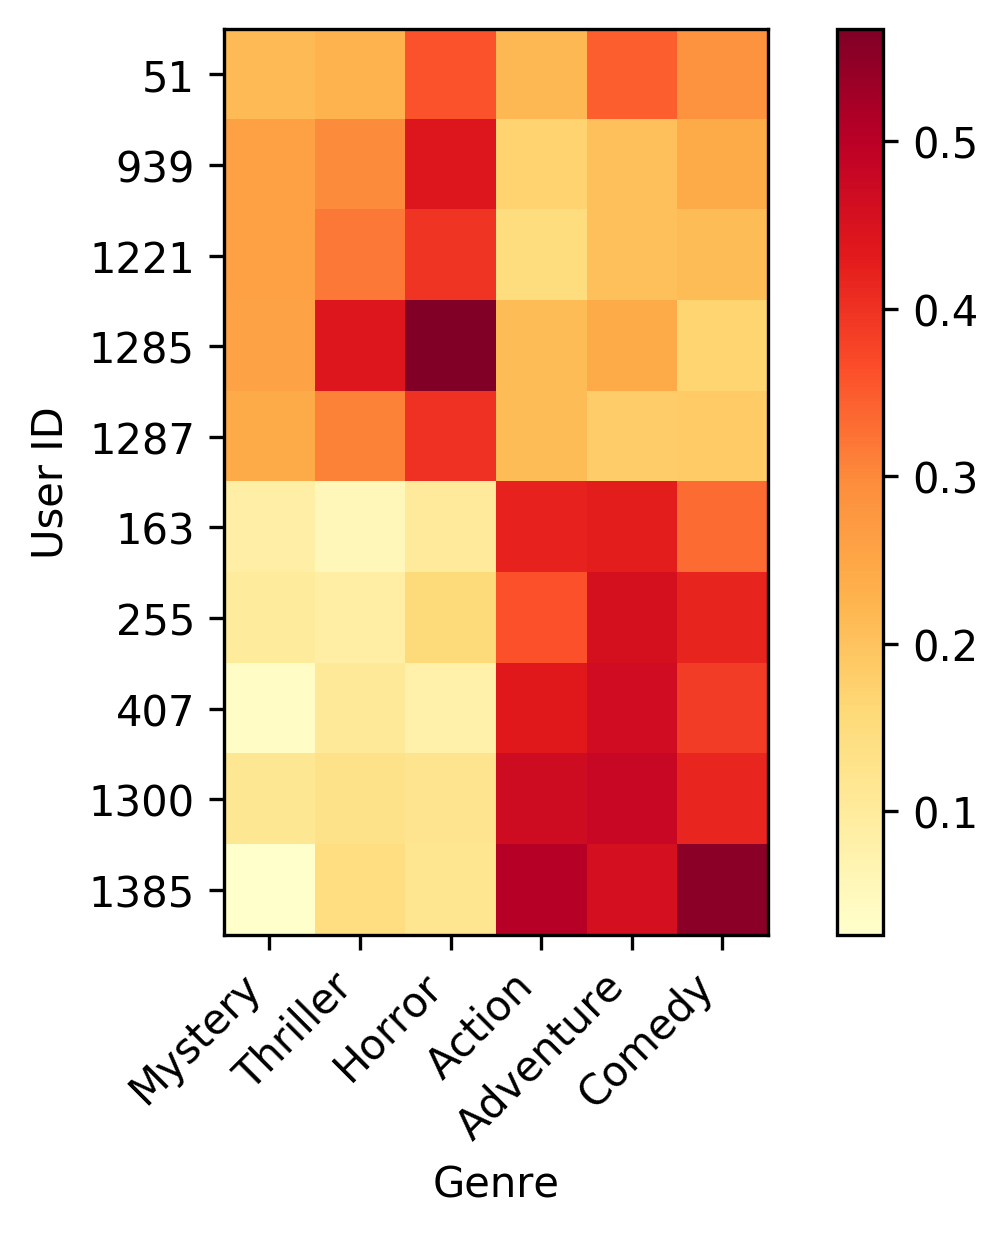

<Figure size 432x288 with 0 Axes>

In [18]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(dpi=300)
#plt.xlim([0,8])  # x軸邊界
#plt.ylim([0,6])  # y軸邊界
plt.xticks(np.arange(len(axis_ytList)),axis_ytList,rotation=45, ha='right')
plt.yticks(np.arange(0,len(selected_idx)),[str(val) for val in (Horror+Action)])
plt.imshow(selected_map, cmap='YlOrRd')
#plt.yticks(np.arange(-1, 7, step=1))
# plt.xlabel('Movie')
plt.xlabel('Genre')
plt.ylabel('User ID')
#plt.title('Examples of attention')
plt.colorbar()
plt.show()
# plt.savefig('./output/movie_attention.png', dpi=300)
plt.savefig('./output/genre_attention.png', dpi=300)